In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Class

In [16]:
class Explorer:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.cat_cols, self.quan_cols = self.check_variables()

    def check_variables(self):
        cols = self.data.columns
        quantitative_cols = self.data._get_numeric_data().columns
        categorical_cols = list(set(cols) - set(quantitative_cols))
        return categorical_cols, list(set(quantitative_cols))


    def categorical(self, col):
        # For categorical variables
        display(pd.DataFrame(self.data[col].value_counts()).T)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        self.data.groupby(col).size().plot(kind='pie', ax=ax1, ylabel='', autopct='%.2f%%')
        ax1.set_title(f'Pie Chart for {col}')

        self.data.groupby(col).size().plot(kind='bar', ax=ax2, rot=0, colormap='Paired')
        plt.bar_label(ax2.containers[0])
        ax2.set_title(f'Bar Chart for {col}')
        
        plt.tight_layout()
        plt.show()

    
    def categorical_md(self, col):
        # For markdown

        counts = pd.DataFrame(self.data[col].value_counts())
        md = f'''
There are {len(counts)} categories of {col}.  '''
        for i, category in enumerate(counts.index):
            s = f'''
There are {counts.values[i][0]} entries of {category}, which takes {round(100*counts.values[i][0]/sum(counts.values)[0], 3)}%.  '''
            md += s

        print(md)


    def quantitative(self, col):
        # For quantitative variables
        
        
        summary_stats = self.data[col].describe().to_frame().transpose().reset_index()
        summary_stats['mode'] = self.data[col].mode().values[0]
        display(summary_stats)
        
        # hist and boxplot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        sns.histplot(data=self.data, x=col, ax=ax1, kde=True, color='skyblue')
        ax1.set_title(f'Histogram of {col}')
        sns.boxplot(data=self.data, y=col, ax=ax2)
        ax2.set_title(f'Boxplot of {col}')
        plt.show()

        # Outliers
        Q75 = self.data[col].quantile(0.75)
        Q25 = self.data[col].quantile(0.25)
        IQR = Q75 - Q25
        outliers = self.data[(self.data[col] < Q25 - 1.5*IQR) | (self.data[col] > Q75 + 1.5*IQR)][col]
        print('Numbers of outliers: ', len(outliers))
        print('Outliers: ')
        print(outliers)
        

    def quantitative_md(self, col):
        # For markdown
            
        Q75 = self.data[col].quantile(0.75)
        Q25 = self.data[col].quantile(0.25)
        IQR = Q75 - Q25

        outliers = len(self.data[(self.data[col] < Q25 - 1.5*IQR) | (self.data[col] > Q75 + 1.5*IQR)][col])

        md = f'''
**Observation**

**Statistical Interpretation**  
The distribution ranges from {self.data[col].min()} to {self.data[col].max()} with range {self.data[col].max()-self.data[col].min()} and is skewed right with only one peak.  
The mean value is {self.data[col].mean()}, the std is {self.data[col].std()}, the mode is {self.data[col].mode().values} and the median is {self.data[col].median()}.  
The 25 and 75 quantiles are {Q25} and {Q75}, the IQR is {IQR}, and there are {outliers} outliers.  '''
        print(md)

In [17]:
exp = Explorer('cleaned_census_income.csv')

In [18]:
exp.data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


# Q1) What are the categorical variables in this dataset, and why?

These variables take category or label values and place an individual into one of several groups.  
['race', 'sex', 'relationship', 'marital.status', 'workclass', 'education', 'occupation', 'income', 'native.country']

In [19]:
print(exp.cat_cols)

['marital.status', 'workclass', 'sex', 'income', 'race', 'native.country', 'occupation', 'relationship', 'education']


# Q2) What are the quantitative variables in this dataset, and why?

These cariables take numerical values and represent some kind of measurement.  
['fnlwgt', 'hours.per.week', 'capital.loss', 'capital.gain', 'education.num', 'age']

In [20]:
print(exp.quan_cols)

['hours.per.week', 'age', 'education.num', 'capital.loss', 'capital.gain', 'fnlwgt']


# Q3) Examine distribution of workclass variable

There are 7 categories of workclass.  
There are 22286 entries of Private, which takes 73.888%.  
There are 2499 entries of Self-emp-not-inc, which takes 8.285%.  
There are 2067 entries of Local-gov, which takes 6.853%.  
There are 1279 entries of State-gov, which takes 4.24%.  
There are 1074 entries of Self-emp-inc, which takes 3.561%.  
There are 943 entries of Federal-gov, which takes 3.126%.  
There are 14 entries of Without-pay, which takes 0.046%.  

workclass,Private,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov,Without-pay
count,22286,2499,2067,1279,1074,943,14


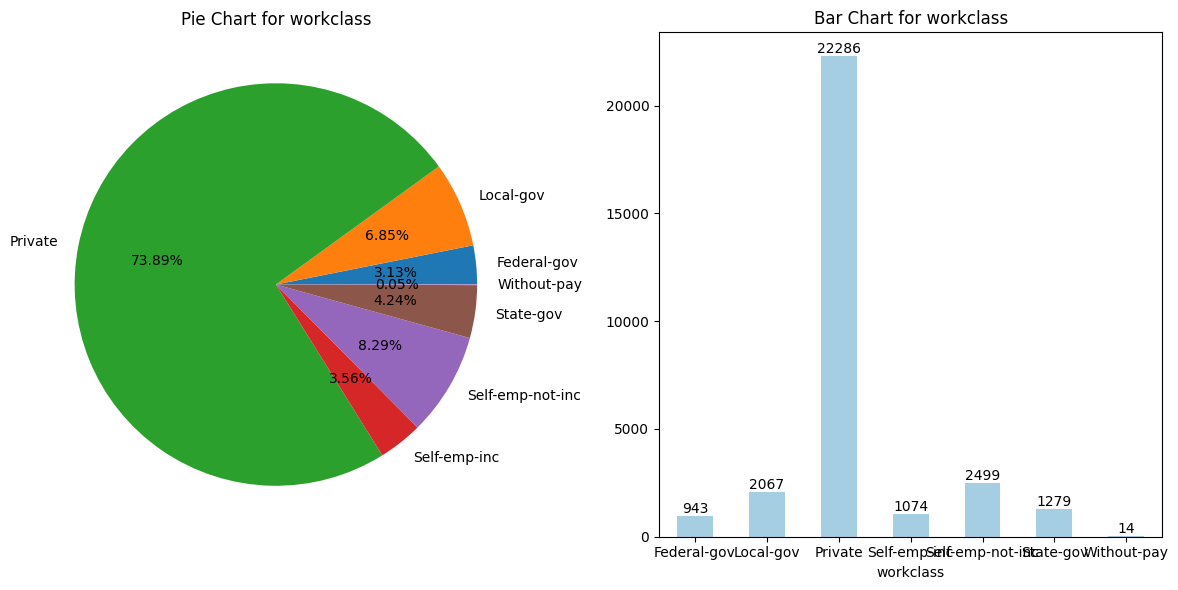


There are 7 categories of workclass.  
There are 22286 entries of Private, which takes 73.888%.  
There are 2499 entries of Self-emp-not-inc, which takes 8.285%.  
There are 2067 entries of Local-gov, which takes 6.853%.  
There are 1279 entries of State-gov, which takes 4.24%.  
There are 1074 entries of Self-emp-inc, which takes 3.561%.  
There are 943 entries of Federal-gov, which takes 3.126%.  
There are 14 entries of Without-pay, which takes 0.046%.  


In [21]:
exp.categorical('workclass')
exp.categorical_md('workclass')

# Q4) Examine distribution of education variable

There are 16 categories of education.  
There are 9840 entries of HS-grad, which takes 32.624%.  
There are 6678 entries of Some-college, which takes 22.14%.  
There are 5044 entries of Bachelors, which takes 16.723%.  
There are 1627 entries of Masters, which takes 5.394%.  
There are 1307 entries of Assoc-voc, which takes 4.333%.  
There are 1048 entries of 11th, which takes 3.475%.  
There are 1008 entries of Assoc-acdm, which takes 3.342%.  
There are 820 entries of 10th, which takes 2.719%.  
There are 557 entries of 7th-8th, which takes 1.847%.  
There are 542 entries of Prof-school, which takes 1.797%.  
There are 455 entries of 9th, which takes 1.509%.  
There are 377 entries of 12th, which takes 1.25%.  
There are 375 entries of Doctorate, which takes 1.243%.  
There are 288 entries of 5th-6th, which takes 0.955%.  
There are 151 entries of 1st-4th, which takes 0.501%.  
There are 45 entries of Preschool, which takes 0.149%.

education,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
count,9840,6678,5044,1627,1307,1048,1008,820,557,542,455,377,375,288,151,45


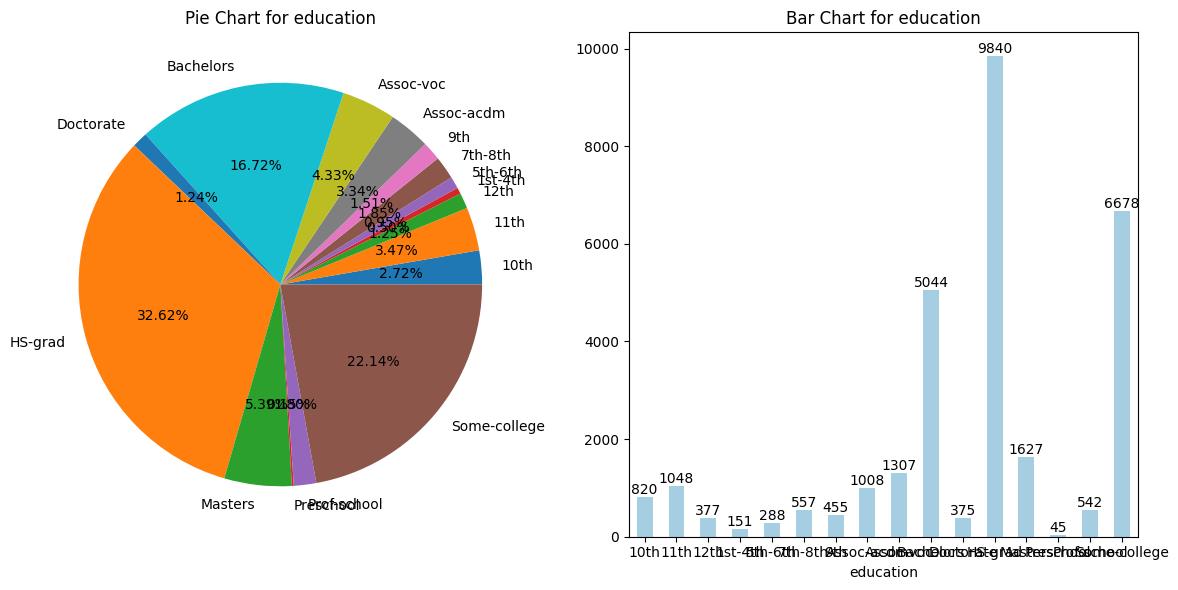


There are 16 categories of education.  
There are 9840 entries of HS-grad, which takes 32.624%.  
There are 6678 entries of Some-college, which takes 22.14%.  
There are 5044 entries of Bachelors, which takes 16.723%.  
There are 1627 entries of Masters, which takes 5.394%.  
There are 1307 entries of Assoc-voc, which takes 4.333%.  
There are 1048 entries of 11th, which takes 3.475%.  
There are 1008 entries of Assoc-acdm, which takes 3.342%.  
There are 820 entries of 10th, which takes 2.719%.  
There are 557 entries of 7th-8th, which takes 1.847%.  
There are 542 entries of Prof-school, which takes 1.797%.  
There are 455 entries of 9th, which takes 1.509%.  
There are 377 entries of 12th, which takes 1.25%.  
There are 375 entries of Doctorate, which takes 1.243%.  
There are 288 entries of 5th-6th, which takes 0.955%.  
There are 151 entries of 1st-4th, which takes 0.501%.  
There are 45 entries of Preschool, which takes 0.149%.  


In [22]:
exp.categorical('education')
exp.categorical_md('education')

# Q5) Examine distribution of marital.status variable 

There are 7 categories of marital.status.  
There are 14065 entries of Married-civ-spouse, which takes 46.632%.  
There are 9726 entries of Never-married, which takes 32.246%.  
There are 4214 entries of Divorced, which takes 13.971%.  
There are 939 entries of Separated, which takes 3.113%.  
There are 827 entries of Widowed, which takes 2.742%.  
There are 370 entries of Married-spouse-absent, which takes 1.227%.  
There are 21 entries of Married-AF-spouse, which takes 0.07%. 

marital.status,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
count,14065,9726,4214,939,827,370,21


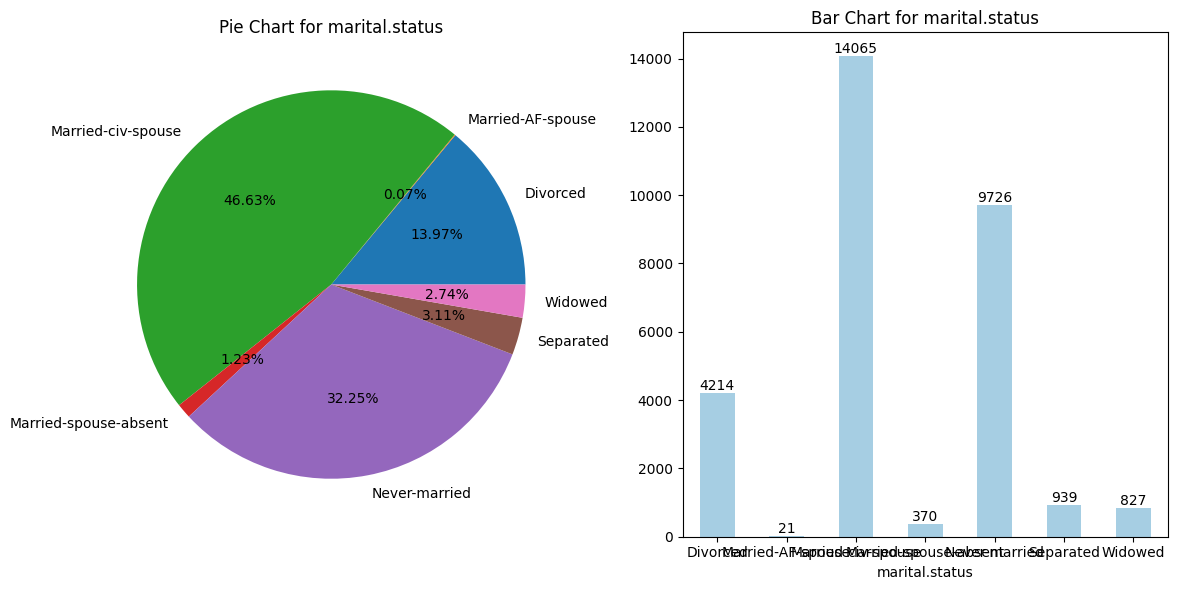


There are 7 categories of marital.status.  
There are 14065 entries of Married-civ-spouse, which takes 46.632%.  
There are 9726 entries of Never-married, which takes 32.246%.  
There are 4214 entries of Divorced, which takes 13.971%.  
There are 939 entries of Separated, which takes 3.113%.  
There are 827 entries of Widowed, which takes 2.742%.  
There are 370 entries of Married-spouse-absent, which takes 1.227%.  
There are 21 entries of Married-AF-spouse, which takes 0.07%.  


In [23]:
exp.categorical('marital.status')
exp.categorical_md('marital.status')

# Q6) Examine distribution of occupation variable

There are 14 categories of occupation.  
There are 4038 entries of Prof-specialty, which takes 13.388%.  
There are 4030 entries of Craft-repair, which takes 13.361%.  
There are 3992 entries of Exec-managerial, which takes 13.235%.  
There are 3721 entries of Adm-clerical, which takes 12.337%.  
There are 3584 entries of Sales, which takes 11.883%.  
There are 3212 entries of Other-service, which takes 10.649%.  
There are 1966 entries of Machine-op-inspct, which takes 6.518%.  
There are 1572 entries of Transport-moving, which takes 5.212%.  
There are 1350 entries of Handlers-cleaners, which takes 4.476%.  
There are 989 entries of Farming-fishing, which takes 3.279%.  
There are 912 entries of Tech-support, which takes 3.024%.  
There are 644 entries of Protective-serv, which takes 2.135%.  
There are 143 entries of Priv-house-serv, which takes 0.474%.  
There are 9 entries of Armed-Forces, which takes 0.03%. 

occupation,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
count,4038,4030,3992,3721,3584,3212,1966,1572,1350,989,912,644,143,9


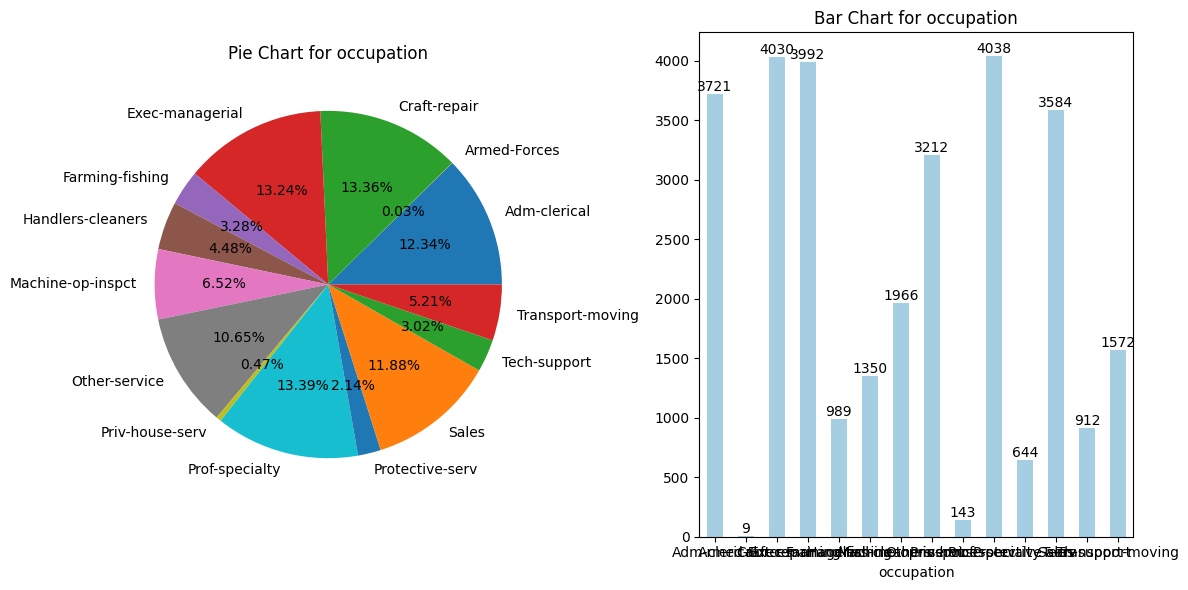


There are 14 categories of occupation.  
There are 4038 entries of Prof-specialty, which takes 13.388%.  
There are 4030 entries of Craft-repair, which takes 13.361%.  
There are 3992 entries of Exec-managerial, which takes 13.235%.  
There are 3721 entries of Adm-clerical, which takes 12.337%.  
There are 3584 entries of Sales, which takes 11.883%.  
There are 3212 entries of Other-service, which takes 10.649%.  
There are 1966 entries of Machine-op-inspct, which takes 6.518%.  
There are 1572 entries of Transport-moving, which takes 5.212%.  
There are 1350 entries of Handlers-cleaners, which takes 4.476%.  
There are 989 entries of Farming-fishing, which takes 3.279%.  
There are 912 entries of Tech-support, which takes 3.024%.  
There are 644 entries of Protective-serv, which takes 2.135%.  
There are 143 entries of Priv-house-serv, which takes 0.474%.  
There are 9 entries of Armed-Forces, which takes 0.03%.  


In [24]:
exp.categorical('occupation')
exp.categorical_md('occupation')

# Q7) Examine distribution of sex variable

There are 2 categories of sex.  
There are 20380 entries of Male, which takes 67.568%.  
There are 9782 entries of Female, which takes 32.432%.  

sex,Male,Female
count,20380,9782


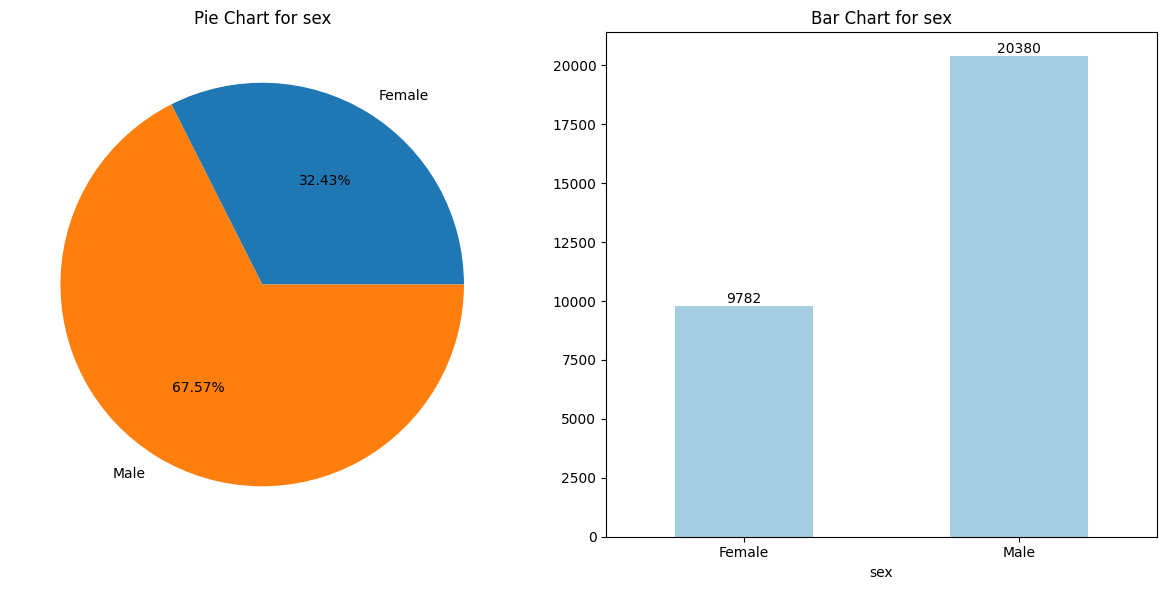


There are 2 categories of sex.  
There are 20380 entries of Male, which takes 67.568%.  
There are 9782 entries of Female, which takes 32.432%.  


In [25]:
exp.categorical('sex')
exp.categorical_md('sex')

# Q8) Examine distribution of age variable 

**Observation**  
The histogram is right skewed.  
There is one peak around 35.  
The center is around 35-40.  
The data range from about 15 to about 90, the approximate range is 75.  
There are outliers approximately range from 80 to 90.

**Statistical Interpretation**  
The distribution ranges from 17 to 90 with range 73 and is skewed right with only one peak.  
The mean value is 38.437901995888865, the std is 13.134664776855985, the mode is [36] and the median is 37.0.  
The 25 and 75 quantiles are 28.0 and 47.0, the IQR is 19.0, and there are 169 outliers.

,index,count,mean,std,min,25%,50%,75%,max,mode
0,age,30162.0,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0,36


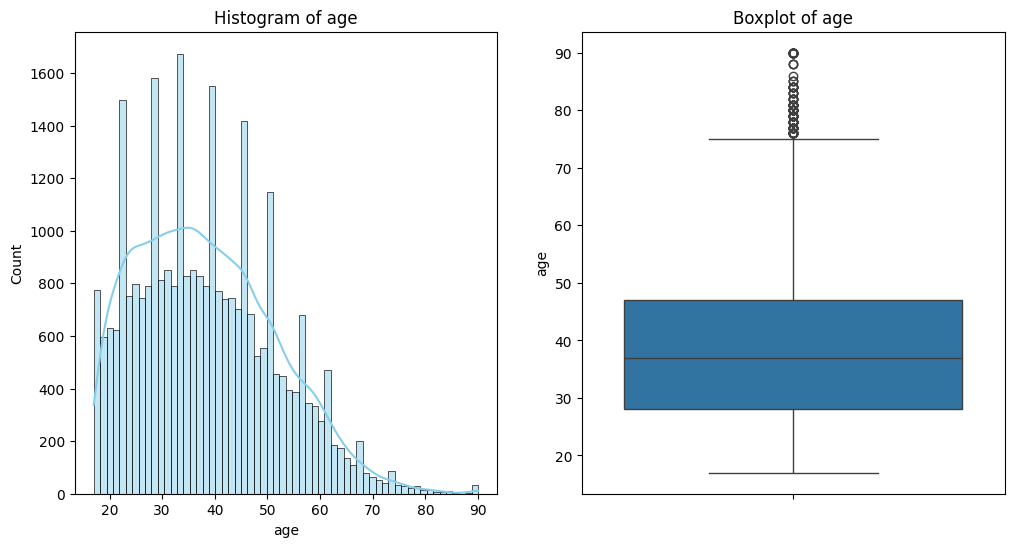

Numbers of outliers:  169
Outliers: 
0        82
102      78
104      83
114      81
179      90
         ..
28936    90
29556    80
29589    82
29928    90
30081    85
Name: age, Length: 169, dtype: int64

**Observation**

**Statistical Interpretation**  
The distribution ranges from 17 to 90 with range 73 and is skewed right with only one peak.  
The mean value is 38.437901995888865, the std is 13.134664776855985, the mode is [36] and the median is 37.0.  
The 25 and 75 quantiles are 28.0 and 47.0, the IQR is 19.0, and there are 169 outliers.  


In [26]:
exp.quantitative('age')
exp.quantitative_md('age')

# Q9) Examine distribution of education.num variable

**Observation**
The histogram is left skewed.  
There are 2 peak at 9 and 13.  
The center is around 10.  
The data range from about 2 to about 16, the approximate range is 14.  
There are outliers approximately range from 0 to 15 and 65 to 100.  

**Statistical Interpretation**  
The distribution ranges from 1 to 16 with range 15 and is skewed right with only one peak.  
The mean value is 10.12131158411246, the std is 2.549994918856736, the mode is [9] and the median is 10.0.  
The 25 and 75 quantiles are 9.0 and 13.0, the IQR is 4.0, and there are 196 outliers. 

,index,count,mean,std,min,25%,50%,75%,max,mode
0,education.num,30162.0,10.121312,2.549995,1.0,9.0,10.0,13.0,16.0,9


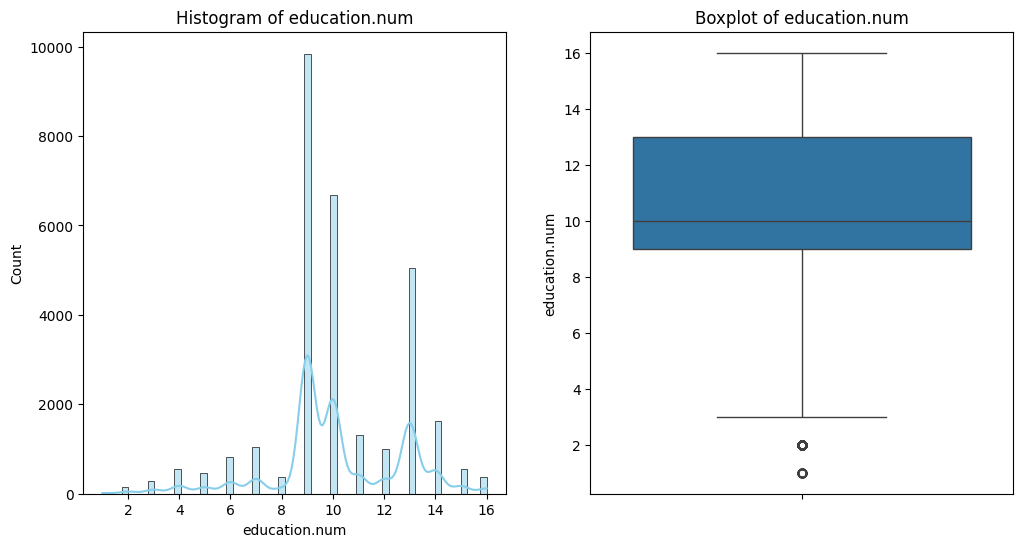

Numbers of outliers:  196
Outliers: 
20       2
197      2
1022     2
1050     1
1096     1
        ..
29954    2
29997    1
30034    2
30054    2
30060    1
Name: education.num, Length: 196, dtype: int64

**Observation**

**Statistical Interpretation**  
The distribution ranges from 1 to 16 with range 15 and is skewed right with only one peak.  
The mean value is 10.12131158411246, the std is 2.549994918856736, the mode is [9] and the median is 10.0.  
The 25 and 75 quantiles are 9.0 and 13.0, the IQR is 4.0, and there are 196 outliers.  


In [27]:
exp.quantitative('education.num')
exp.quantitative_md('education.num')

# Q10) Examine distribution of hours.per.week variable

**Observation**  
The histogram is right skewed.  
There is 1 peak at about 40.  
The center is around 40-45.  
The data range from about 0 to about 100, the approximate range is 100.  
There are outliers approximately range from 2 to 3.  

**Statistical Interpretation**  
The distribution ranges from 1 to 99 with range 98 and is skewed right with only one peak.  
The mean value is 40.93123798156621, the std is 11.979984229274882, the mode is [40] and the median is 40.0.  
The 25 and 75 quantiles are 40.0 and 45.0, the IQR is 5.0, and there are 7953 outliers.  

,index,count,mean,std,min,25%,50%,75%,max,mode
0,hours.per.week,30162.0,40.931238,11.979984,1.0,40.0,40.0,45.0,99.0,40


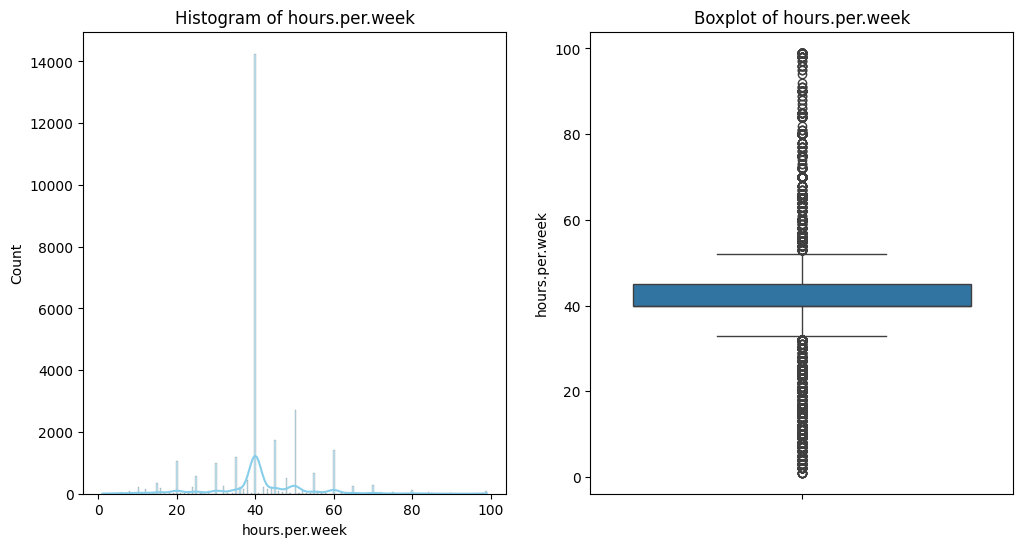

Numbers of outliers:  7953
Outliers: 
0        18
5        20
9        20
10       55
12       76
         ..
30143    55
30147    30
30148    20
30155    11
30161    20
Name: hours.per.week, Length: 7953, dtype: int64

**Observation**

**Statistical Interpretation**  
The distribution ranges from 1 to 99 with range 98 and is skewed right with only one peak.  
The mean value is 40.93123798156621, the std is 11.979984229274882, the mode is [40] and the median is 40.0.  
The 25 and 75 quantiles are 40.0 and 45.0, the IQR is 5.0, and there are 7953 outliers.  


In [28]:
exp.quantitative('hours.per.week')
exp.quantitative_md('hours.per.week')